In [9]:
import config
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# load preprocessed data
X = pd.read_pickle("../data/clean/X_data.pkl")
y = pd.read_pickle("../data/clean/y_data.pkl")

In [3]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=config.test_size,
    stratify=y if config.stratify else None,
    random_state=config.random_state
)

In [4]:
# train random forest model
model = RandomForestClassifier(**config.rf_params)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=66)

In [5]:
# use trained model to predict test and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[[3778   33]
 [  88  152]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3811
           1       0.82      0.63      0.72       240

    accuracy                           0.97      4051
   macro avg       0.90      0.81      0.85      4051
weighted avg       0.97      0.97      0.97      4051



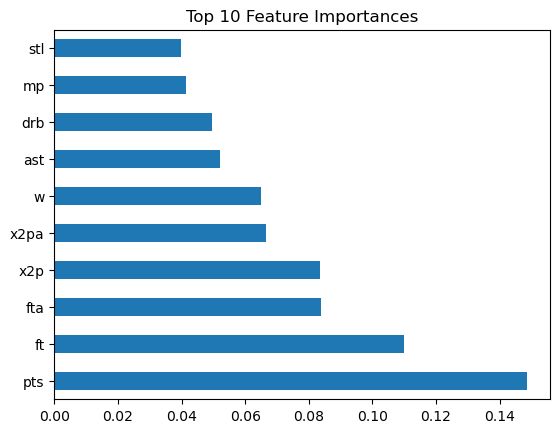

In [6]:
# check feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.show()

Not amazing. Let's try a randomized search to look for better hyperparameters.

In [7]:
# hyperparameter tuning using RandomizedSearchCV
search_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=config.random_state),
    param_distributions=config.rf_param_dist,
    **config.search_cv_params
)
search_model.fit(X_train, y_train)

# evaluate tuned model
y_pred_search = search_model.predict(X_test)
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_search))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=3

/Users/paulfox/opt/anaconda3/envs/eda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
39 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/paulfox/opt/anaconda3/envs/eda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paulfox/opt/anaconda3/envs/eda/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/paulfox/opt/anaconda3/envs/eda/lib/python3.10/site-packages/sklearn/base.py", line 436, in _valida

Best Recall: 0.6884619775102158
Best Params: {'n_estimators': np.int64(500), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Test Recall: 0.6416666666666667
